In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow
print(tensorflow.__version__)
import tensorflow as tf
print(tf.version)

2.8.2
<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.7/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [ ]:
import sys
import os
import argparse

# Time
import time
import datetime

# Numerical Data
import random
import numpy as np 
import pandas as pd

# Tools
import shutil
from glob import glob
from tqdm import tqdm
import gc

# NLP
import re

# Preprocessing
from sklearn import preprocessing
from sklearn.utils.class_weight import compute_class_weight
from sklearn.utils import shuffle

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Machine Learning Models
from sklearn import svm
from sklearn.svm import LinearSVC, SVC

# Evaluation Metrics
from sklearn import metrics 
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score

#tesnorflow
import tensorflow as tf
from tensorflow import keras
# Deep Learning - Keras -  Preprocessing
from keras.preprocessing.image import ImageDataGenerator

# Deep Learning - Keras - Model

import keras
from keras import models
from keras.models import Model
from keras.models import Sequential
from tensorflow.keras.preprocessing import image


In [ ]:
!pip install requests pillow
!pip install requests_toolbelt
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 1.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 4.0 MB/s 
     |████████████████████████████████| 178 kB 35.5 MB/s 
     |████████████████████████████████| 1.1 MB 45.1 MB/s 
     |████████████████████████████████| 67 kB 6.0 MB/s 
     |████████████████████████████████| 138 kB 48.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=d46600f868d9a0afa75b4955b56be21880b4c51d079fe7d0c40749d41f135233
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.

In [ ]:
# Loading Models:
face_model = tf.keras.models.load_model('/content/drive/MyDrive/models_collection/inceptionv3face')

chest_model = tf.keras.models.load_model('/content/drive/MyDrive/models_collection/Inceptionv3 Chest')

upper_model = tf.keras.models.load_model('/content/drive/MyDrive/models_collection/Inceptionv3 Upper')

lower_model = tf.keras.models.load_model('/content/drive/MyDrive/models_collection/Inceptionv3 Lower')

loading Roboflow workspace...
loading Roboflow project...


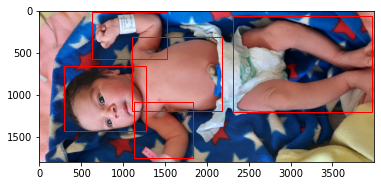

In [ ]:
from roboflow import Roboflow

given = '/content/1614154090605.jpg'
# obtaining your API key: https://docs.roboflow.com/rest-api#obtaining-your-api-key
rf = Roboflow(api_key="Your Key")


workspace = rf.workspace("ncl-kso5y")

project = workspace.project("abc-vz5u0")

# if you want to attempt reuploading image on failure

version = project.version(1)

model = version.model
prediction = model.predict(given) # or

prediction.plot()

# prediction.save(output_path="predictions.jpg")

In [ ]:
print(prediction)

{
  "x": 783.5,
  "y": 1044.5,
  "width": 971,
  "height": 769,
  "class": "facerotation",
  "confidence": 0.903,
  "image_path": "/content/1614154090605.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 1644.5,
  "y": 755.5,
  "width": 1077,
  "height": 885,
  "class": "chestrotation",
  "confidence": 0.878,
  "image_path": "/content/1614154090605.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 3144.0,
  "y": 635.5,
  "width": 1654,
  "height": 1145,
  "class": "lower limbsrotation",
  "confidence": 0.843,
  "image_path": "/content/1614154090605.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 1072.0,
  "y": 289.5,
  "width": 894,
  "height": 567,
  "class": "upper limbsrotation",
  "confidence": 0.837,
  "image_path": "/content/1614154090605.jpg",
  "prediction_type": "ObjectDetectionModel"
}

{
  "x": 1481.0,
  "y": 1419.5,
  "width": 712,
  "height": 673,
  "class": "upper limbsrotation",
  "confidence": 0.777,
  "image_path": "/content/161415

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
organs = {}
count = 0

for i in prediction:
      img = Image.open(given)
      # Crop image
      im = img.crop((i['x'], i['y'],
                  i['x']+i['width'], i['y']+i['height']))
      save_path = '/content/organs/'
      im.save(save_path + i['class'][0:-8] + '_' + str(count) + '.jpg')
      count+=1

In [ ]:
import os
load_path = '/content/organs/'
files = os.listdir(load_path)

In [ ]:
print('''
0: Abnormal
1: Normal
''')
for i in files:
  if 'face' in i:
    path = load_path+i
    imgf = image.load_img(path,target_size=(224,224))
    imgf = np.array(imgf)
    imgf = imgf / 255.0
    imgf = imgf.reshape(1,224,224,3)
    pred = face_model.predict(imgf)
    print(f'face : {np.argmax(pred)}')
  elif 'chest' in i:
    path = load_path+i
    imgf = image.load_img(path,target_size=(224,224))
    imgf = np.array(imgf)
    imgf = imgf / 255.0
    imgf = imgf.reshape(1,224,224,3)
    pred = chest_model.predict(imgf)
    print(f'chest : {np.argmax(pred)}')
  elif 'upper' in i:
    path = load_path+i
    imgf = image.load_img(path,target_size=(224,224))
    imgf = np.array(imgf)
    imgf = imgf / 255.0
    imgf = imgf.reshape(1,224,224,3)
    pred = upper_model.predict(imgf)
    print(f'upper limb : {np.argmax(pred)}')
  elif 'lower' in i:
    path = load_path+i
    imgf = image.load_img(path,target_size=(224,224))
    imgf = np.array(imgf)
    imgf = imgf / 255.0
    imgf = imgf.reshape(1,224,224,3)
    pred = lower_model.predict(imgf)
    print(f'lower limb : {np.argmax(pred)}')
  else:
    pass


0: Abnormal
1: Normal

upper limb : 1
chest : 1
face : 1
lower limb : 1
upper limb : 1
